In [1]:
exec(open("inc_notebook.py").read())

current working dirF:\myProjects\tfKeras\UCSC\CMPS242\earthquake


In [2]:
import logging, sys, math,os
exec(open("estimator/initKeras.py").read())


Using TensorFlow backend.


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
if sys.modules.get( 'library.MultipleBinDataGenerator', False ) != False :
    del sys.modules['library.MultipleBinDataGenerator'] 
if sys.modules.get( 'MultipleBinDataGenerator', False ) != False :
    del sys.modules['MultipleBinDataGenerator'] 
from library.MultipleBinDataGenerator import *

logging.warning( "MultipleBinDataGenerator loaded" )

trainGenerator = MultipleBinDataGenerator(batch_size=16, windowSize = 36, stride = 6)

D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator RobustScaler from version 0.20.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [6]:
trainGenerator.__len__()

1599

In [7]:
model_input = layers.Input( shape = ( 15 + 6 * 27 + 2 + 15+ 3 * 27,  ) )

In [8]:
x = layers.Dense(64)(model_input)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(16)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(1, activation=activations.relu)(x)

model = models.Model(model_input, x, name = "TinyFFN")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 275)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                17664     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
__________

In [9]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss = losses.MSE,
             metrics = [metrics.MSE, metrics.MAE])

In [10]:
sys.path.remove(str(projectFolder))
os.chdir(currentFolder)

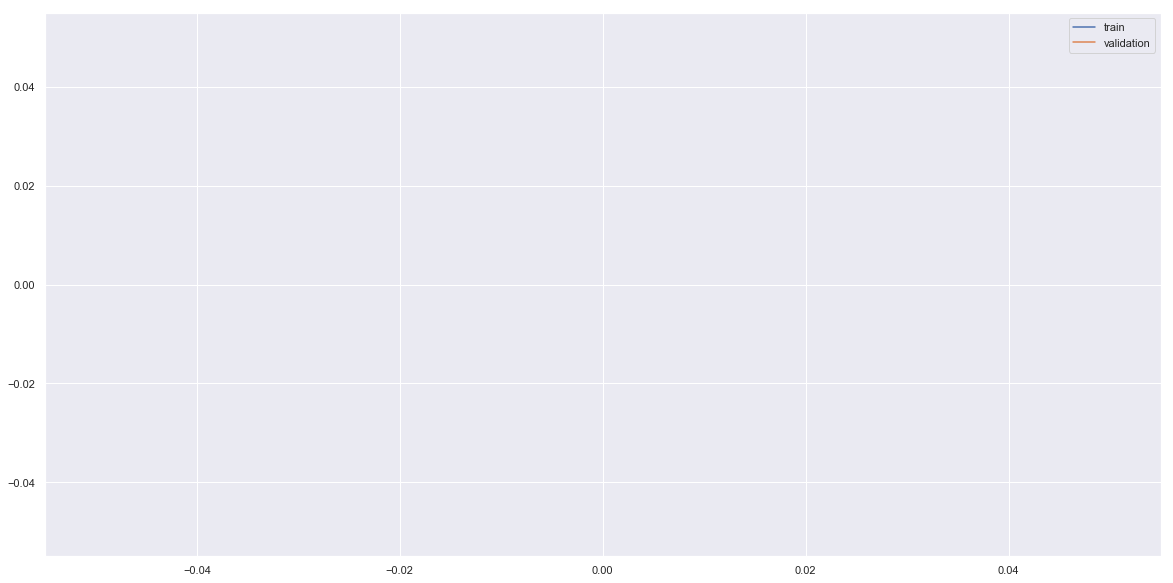

Epoch 3/12
1428/1599 [=========================>....] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

KeyboardInterrupt: 

In [11]:
np.seterr(invalid='ignore')
np.warnings.filterwarnings('ignore')
history = model.fit_generator( generator=trainGenerator,
                    use_multiprocessing=False, 
                    workers=2, 
                    initial_epoch = 0,
                    epochs=12,
                    max_q_size = 10,
                    steps_per_epoch = trainGenerator.__len__(),
                    callbacks = [livePlotKeras]
                   )

In [ ]:
aBatch = trainGenerator.__getitem__(0)

In [ ]:
os.getcwd()

In [13]:
aBatch.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [14]:
X, y = trainGenerator.__getitem__(0)

In [15]:
X.shape

(16, 275)

In [16]:
y.shape

(16,)

In [17]:
y

array([1.43189548, 1.42549548, 1.41909548, 1.41269548, 1.40639548,
       1.39999548, 1.39359548, 1.38719548, 1.38079548, 1.37439548,
       1.36809548, 1.36169548, 1.35529548, 1.34889548, 1.34249548,
       1.33609548])

In [26]:
nanIndices = np.isnan(X[1])

In [27]:
np.sum(nanIndices == True)

15

In [30]:
np.where(nanIndices)

(array([179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
        192, 193], dtype=int64),)

In [32]:
np.where(np.isnan(X[1]))

(array([179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
        192, 193], dtype=int64),)

In [33]:
np.where(np.isnan(X[2]))

(array([179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
        192, 193], dtype=int64),)